## **Plottable**

_Serie B 2023/24_

In [1]:
# imports
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from highlight_text import fig_text

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from PIL import Image
import urllib

Scrape data from [Fbref](https://fbref.com/), plot data with `Plottable` in `.py`

In [2]:
# read data from fbref
serieB = pd.read_html('https://fbref.com/en/comps/18/Serie-B-Stats', attrs={'id': "results2023-2024181_overall"})[0]

print(serieB.shape)
print('')
print(serieB.columns)
print('')
serieB.head()

(20, 20)

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')



,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Parma,34,20,10,4,59,32,27,70,2.06,45.2,33.7,11.6,0.34,W L D W D,8297,Dennis Man - 11,Leandro Chichizola,NaN
1,2,Como,34,20,7,7,54,37,17,67,1.97,44.1,34.5,9.6,0.28,W W W W W,3252,Patrick Cutrone - 13,Adrian Šemper,NaN
2,3,Venezia,34,19,7,8,62,39,23,64,1.88,52.4,34.1,18.3,0.54,W L D W W,3638,Joel Pohjanpalo - 20,Jesse Joronen,NaN
3,4,Cremonese,34,17,9,8,43,28,15,60,1.76,49.6,31.5,18.0,0.53,L L W L D,5630,Massimo Coda - 14,Andreas Jungdal,NaN
4,5,Catanzaro,34,16,8,10,53,42,11,56,1.65,40.7,43.8,-3.1,-0.09,D W L W D,5741,Pietro Iemmello - 13,Andrea Fulignati,NaN


In [3]:
# read and insert Club's badges
serieB['badge'] = serieB['Squad'].apply(
    lambda x: f"../../logos/SerieB/{x.lower()}.png"
)

In [4]:
# data cleaning
serieB[['xG', 'xGA', 'xGD', 'xGD/90']] = serieB[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

serieB = serieB[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [5]:
# set up the colors
bg_color = "#ffffff"
text_color = "#000000"

row_colors = {
    "top2": "#C9FFB2",
    "playoff": "#FFFAA0",
    "playout": "#FFB17A",
    "relegation": "#FF8080",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [6]:
# create ColumnDefinitions for the table
# 1- load images
# 2- add color
# 3- add columns to groups

col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieB["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieB["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieB["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

(-0.5, 191.5, 191.5, -0.5)

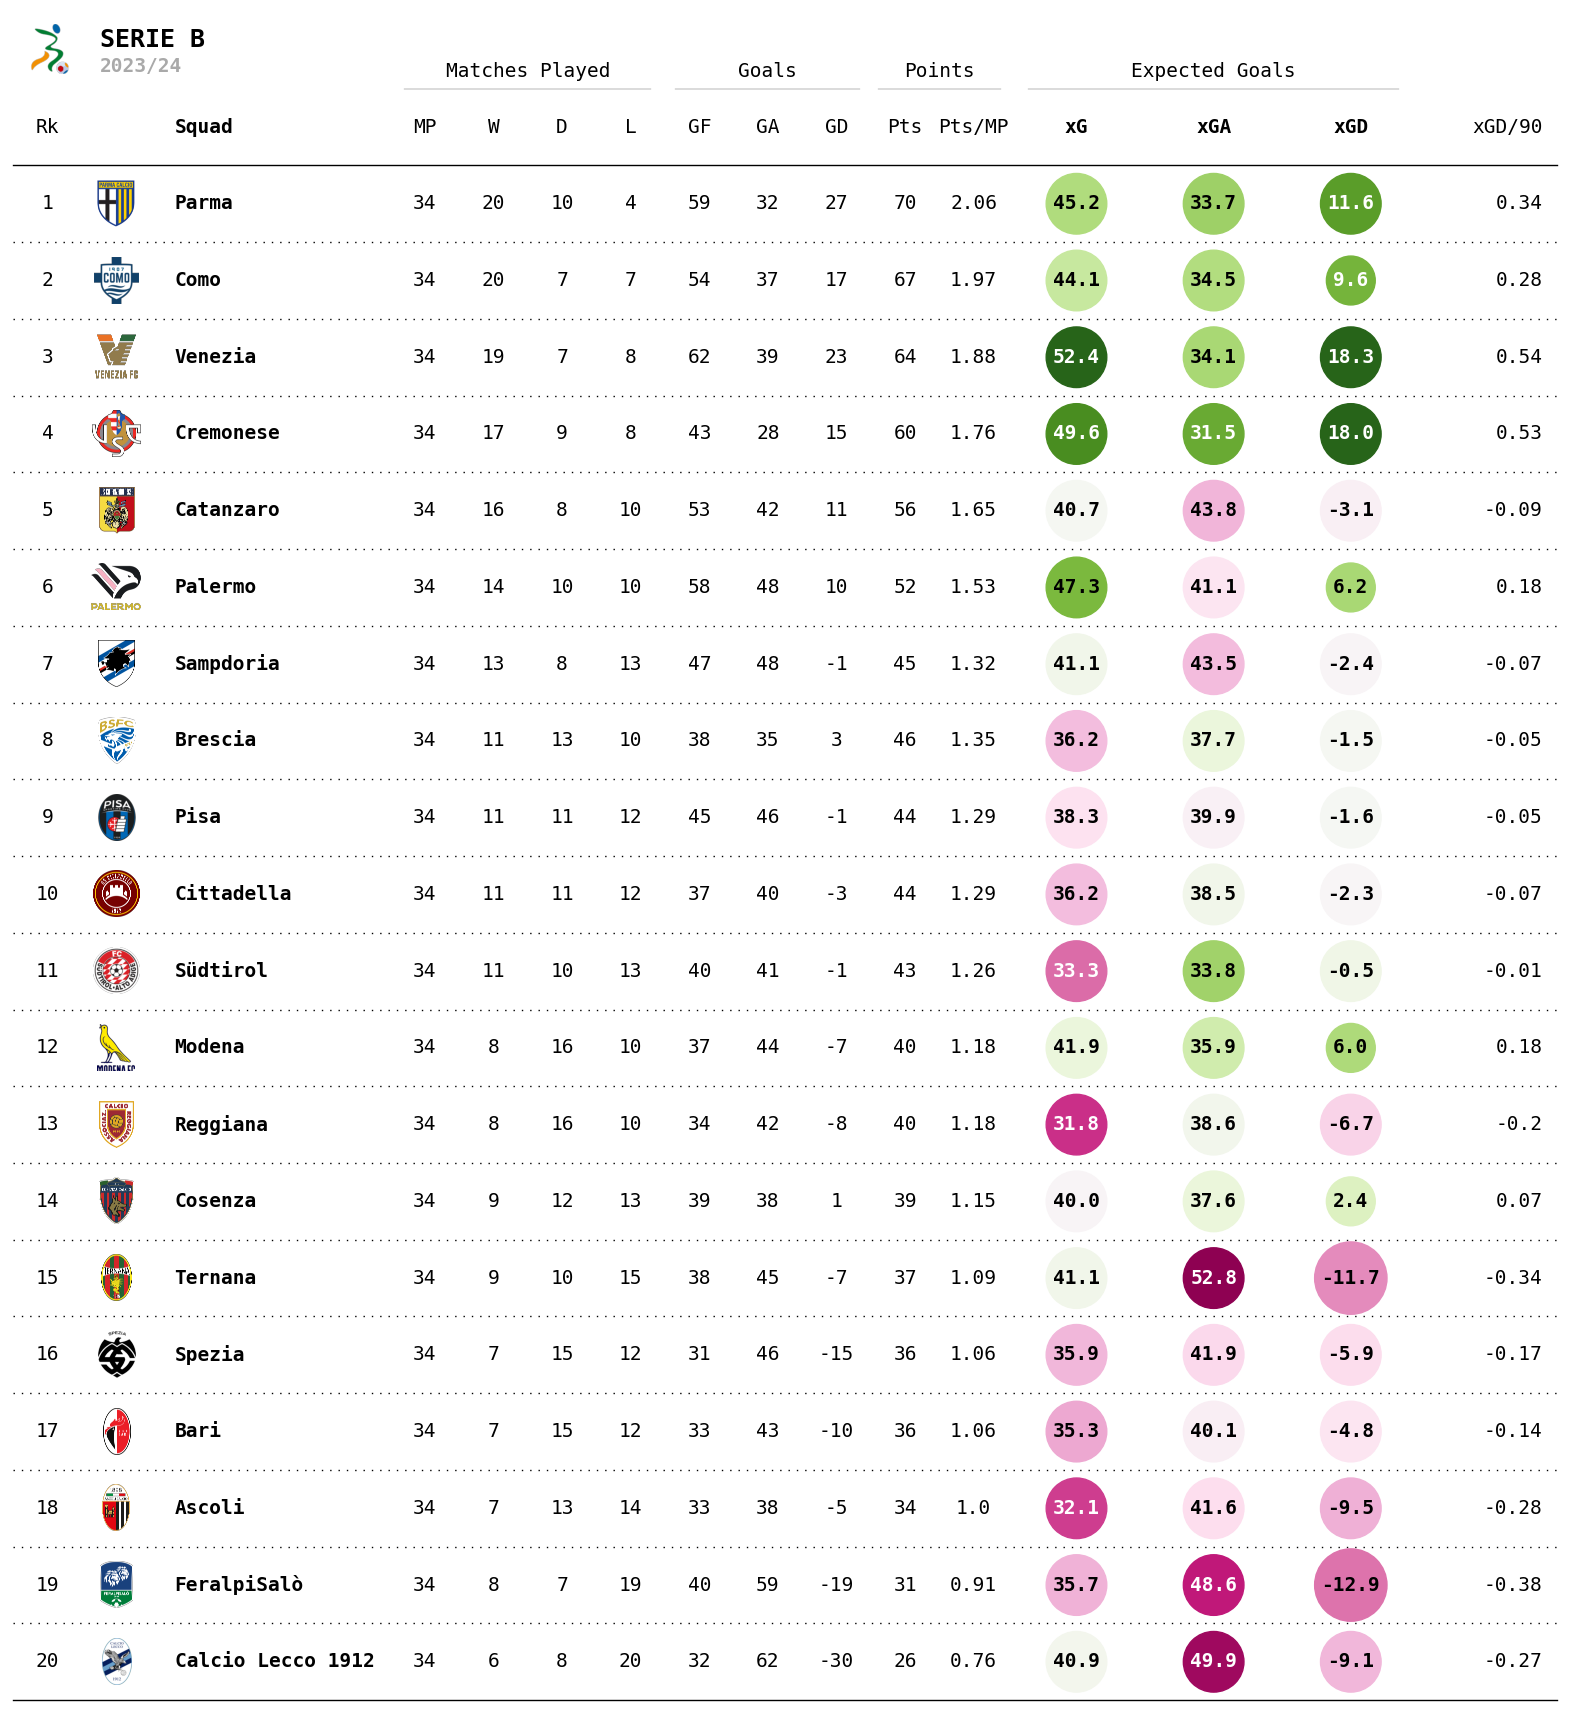

In [7]:
# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    serieB,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# title and subtitle for the legend
fig_text(
    x = 0.17, y = .872,
    s = "SERIE B\n<2023/24>",
    highlight_textprops=[
        {"color": "darkgrey", "weight": "bold", "size": 14}
    ],
    #color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/86.png"

logo_ax = fig.add_axes([0.1325, 0.85, 0.025, 0.025], zorder=1) # position and then size 
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# Optional: add colors to the rows

# for idx in [0, 1]:
#     table.rows[idx].set_facecolor(row_colors["top2"])
# for idx in [2,3, 4, 5, 6, 7]:
#     table.rows[idx].set_facecolor(row_colors["playoff"])
# for idx in [15, 16]:
#     table.rows[idx].set_facecolor(row_colors["playout"])
# for idx in [17, 18, 19]:
#     table.rows[idx].set_facecolor(row_colors["relegation"])

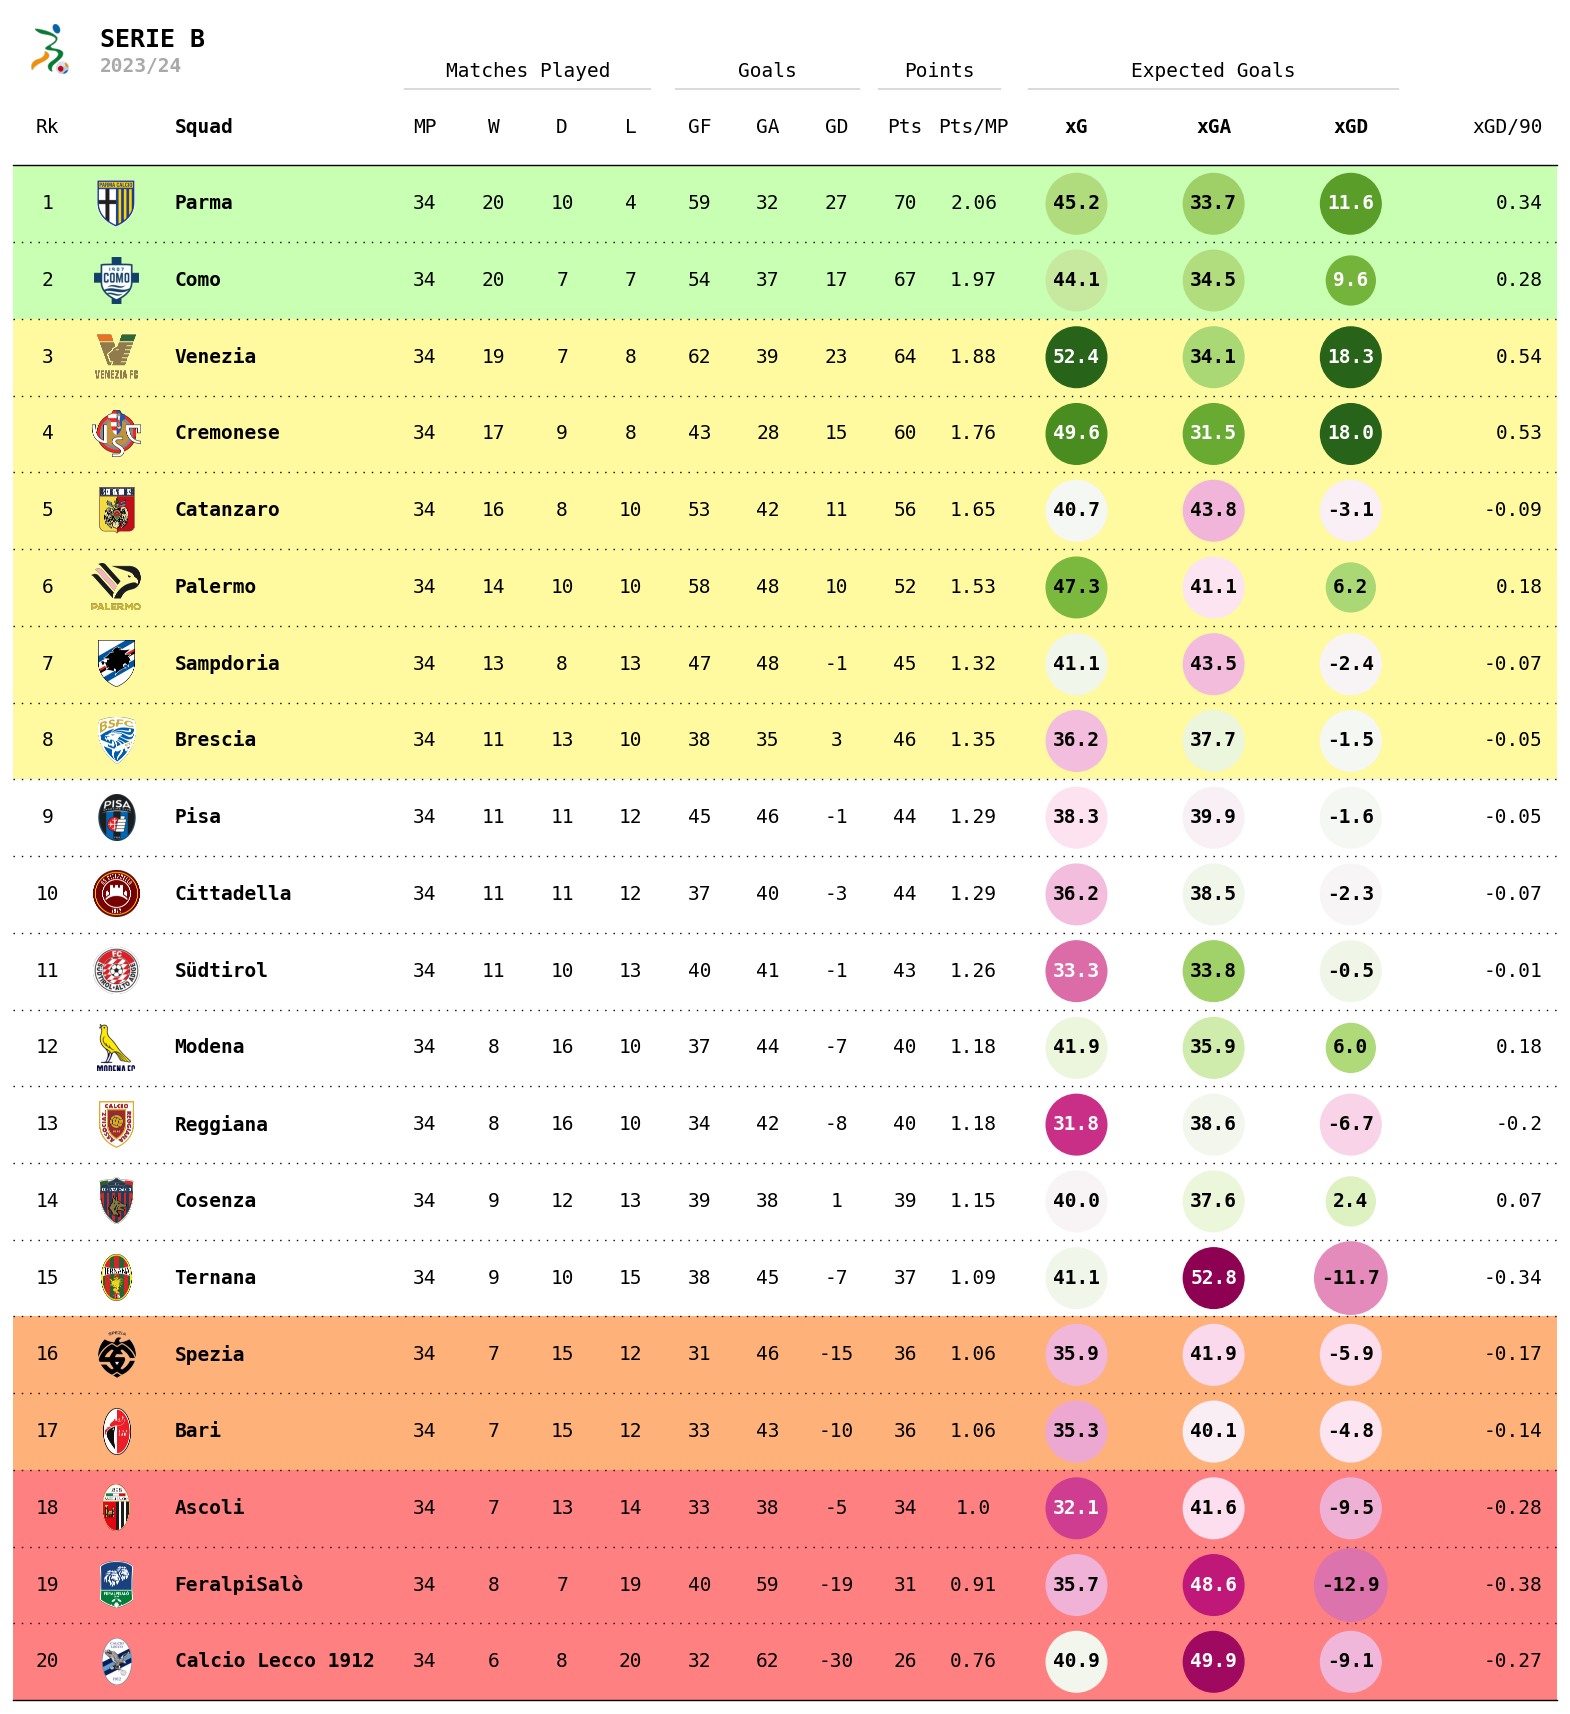

In [8]:
# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    serieB,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# title and subtitle for the legend
fig_text(
    x = 0.17, y = .872,
    s = "SERIE B\n<2023/24>",
    highlight_textprops=[
        {"color": "darkgrey", "weight": "bold", "size": 14}
    ],
    #color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/86.png"

logo_ax = fig.add_axes([0.1325, 0.85, 0.025, 0.025], zorder=1) # position and then size 
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# Optional: add colors to the rows

for idx in [0, 1]:
    table.rows[idx].set_facecolor(row_colors["top2"])
for idx in [2,3, 4, 5, 6, 7]:
    table.rows[idx].set_facecolor(row_colors["playoff"])
for idx in [15, 16]:
    table.rows[idx].set_facecolor(row_colors["playout"])
for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])

In [9]:
# save figure
fig.savefig("../figures/serieB_2324_MD31.png", facecolor=ax.get_facecolor(), dpi=200, bbox_inches="tight")